# CHEM7370 Class 10
## Plotting spectra
This exercise has been made possible by Professor Paul Ohno, who generously shared the spectral data that we will be analyzing and plotting today.

You should have received two data files by email, or downloaded them from Canvas: `BackgroundSpectrum.txt` and `SampleSpectrum.txt` (the filenames explain their contents very well). Did you put them in the `data` subdirectory of your class folder, just like the other data we have been working with? If yes, let's open one of the files and take a look.

In [1]:
import os
sample_filename = os.path.join('data', 'SampleSpectrum.txt')
sample_file = open(sample_filename,"r")
data = sample_file.readlines()
sample_file.close()
for line in data:
    print(line, end="")  # no need for an extra new line after each line (which already ends in the newline character)

time	20220215_161332
start	528.0 nm
stop	726.0 nm
step	2.0 nm
duration	4 s

wl	pt1	pt2	pt3	pt4
528.0		12628.	12374.	12283.	12476.
530.0	18156.	18164.	18133.	18117.
532.0	23233.	23413.	23568.	23130.
534.0	21185.	21105.	20909.	20831.
536.0		15084.	15030.	15246.	15357.
538.0	9329.	9307.	9232.	9210.
540.0	4447.	4353.	4341.	4391.
542.0	3946.	3960.	3994.	4105.
544.0	6354.	6393.	6623.	6346.
546.0	9503.	9372.	9563.	9327.
548.0	11424.	11505.	11541.	11266.
550.0	11874.	11956.	12029.	11961.
552.0		11144.	11082.	11077.	11028.
554.0	9295.	9518.	9477.	9346.
556.0	7919.	7800.	7998.	8118.
558.0	6842.	6733.	6806.	6904.
560.0	5961.	5883.	6043.	5859.
562.0	5550.	5275.	5460.	5261.
564.0	4893.	4877.	4865.	4981.
566.0	4471.	4637.	4620.	4769.
568.0	4370.	4481.	4350.	4326.
570.0	4182.	4368.	4407.	4249.
572.0	4260.	4305.	4313.	4249.
574.0	6004.	5976.	6005.	6111.
576.0	7998.	8323.	8204.	8124.
578.0	10616.	10547.	10296.	10603.
580.0	11666.	11898.	11727.	11449.
582.0	10495.	10365.	10430.	10328.
584.0	8149.	8292.	

We see that the first 6 lines hold some general information and can be discarded, the seventh line contains headers of the columns, and all the data beyond it are numbers separated by spaces. Therefore, let's put the data into a `numpy` array `sample` and the column headers into a list `headers_sample`.

In [2]:
import numpy
headers_sample = data[6].split()
print(headers_sample)
sample = numpy.genfromtxt(fname=sample_filename, skip_header=7)
print(sample)
print(sample.shape)

['wl', 'pt1', 'pt2', 'pt3', 'pt4']
[[  528. 12628. 12374. 12283. 12476.]
 [  530. 18156. 18164. 18133. 18117.]
 [  532. 23233. 23413. 23568. 23130.]
 [  534. 21185. 21105. 20909. 20831.]
 [  536. 15084. 15030. 15246. 15357.]
 [  538.  9329.  9307.  9232.  9210.]
 [  540.  4447.  4353.  4341.  4391.]
 [  542.  3946.  3960.  3994.  4105.]
 [  544.  6354.  6393.  6623.  6346.]
 [  546.  9503.  9372.  9563.  9327.]
 [  548. 11424. 11505. 11541. 11266.]
 [  550. 11874. 11956. 12029. 11961.]
 [  552. 11144. 11082. 11077. 11028.]
 [  554.  9295.  9518.  9477.  9346.]
 [  556.  7919.  7800.  7998.  8118.]
 [  558.  6842.  6733.  6806.  6904.]
 [  560.  5961.  5883.  6043.  5859.]
 [  562.  5550.  5275.  5460.  5261.]
 [  564.  4893.  4877.  4865.  4981.]
 [  566.  4471.  4637.  4620.  4769.]
 [  568.  4370.  4481.  4350.  4326.]
 [  570.  4182.  4368.  4407.  4249.]
 [  572.  4260.  4305.  4313.  4249.]
 [  574.  6004.  5976.  6005.  6111.]
 [  576.  7998.  8323.  8204.  8124.]
 [  578. 10616.

Professor Ohno told me that he measured each spectrum four times, and the columns `pt1-pt4` contain the results of each measurement, the signal intensities in arbitrary units (the column `wl` lists the wavelengths in nanometers). 

The first thing we want to do is average the four measured values for each wavelength. Sounds like a job for the `numpy.mean()` function that takes a numpy array and calculates its mean. Let's slice out the four data columns and try to average them:

In [3]:
avg_sample = numpy.mean(sample[:,1:])
print(avg_sample)

7580.9375


Oops, this didn't work as expected! We averaged too much and calculated a single number that is a mean of *all* measurements at *all* wavelengths. To calculate the mean at each wavelength separately, we need to use the `axis=n` option of `numpy.mean()` that calculates the average along the axis number `n`. 

Modify the previous cell to produce an array with averaged measurements for one wavelength at a time. While you're at it, you can also compute the standard deviation of the four values using the `numpy.std()` function.

In [4]:
avg_sample = numpy.mean(sample[:,1:],axis=1)
print(avg_sample)
std_sample = numpy.std(sample[:,1:],axis=1)
print(std_sample)

[12440.25 18142.5  23336.   21007.5  15179.25  9269.5   4383.    4001.25
  6429.    9441.25 11434.   11955.   11082.75  9409.    7958.75  6821.25
  5936.5   5386.5   4904.    4624.25  4381.75  4301.5   4281.75  6024.
  8162.25 10515.5  11685.   10404.5   8228.25  6130.75  4268.    3790.25
  3714.25  3885.5   3955.25  4229.5   5927.   10290.5  15285.25 19504.
 20643.5  16985.75 12901.    9176.25  6506.75  6621.    6946.25  7295.75
  7721.5   8001.25  8545.    8894.    9128.25  9226.25  9520.75  9551.75
  9615.75  9558.25  9344.5   9287.    9203.5   8958.5   8770.25  8538.25
  8403.25  8408.    8329.    8130.    7734.25  7620.75  7463.    7327.25
  7256.75  6944.    6658.5   6319.25  5989.    5684.75  5293.    5089.
  4774.75  4569.    4221.75  4060.25  3881.5   3674.75  3493.75  3378.
  3147.25  3087.5   2939.5   2732.5   2671.    2468.25  2382.25  2314.5
  2271.75  2168.    2127.25  2033.25]
[128.10615715  18.60779407 167.9270675  143.06204948 129.80634615
  49.73178058  41.30375286  6

Now that we have the spectral intensity and its standard deviation for each wavelength, it is time to `import matplotlib.pyplot as plt` and plot the spectrum. First, let's try using the `plt.plot(x,y)` command that we already know to graph all measured numbers.

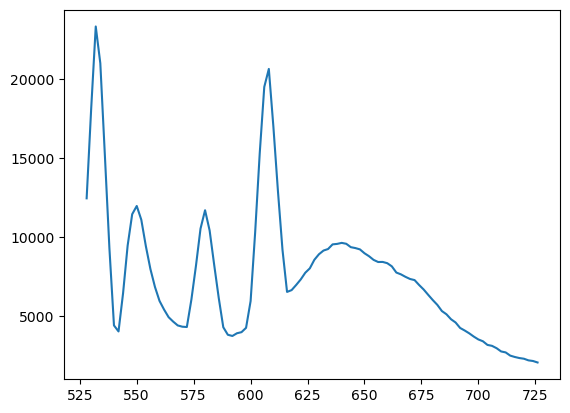

In [5]:
import matplotlib.pyplot as plt
plt.plot(sample[:,0],avg_sample)   # complete this line

Now, let's try adding the error bars using the slightly more involved function `plt.errorbar(array_x, array_y, yerr=array_errors)`. You may experiment with different plot formats - I particularly like adding the `fmt='none'` option that draws the errorbar lines only, no data points. In any case, you will see that the error bars are very small in the scale of the figure - that was a precise measurement!

<ErrorbarContainer object of 3 artists>

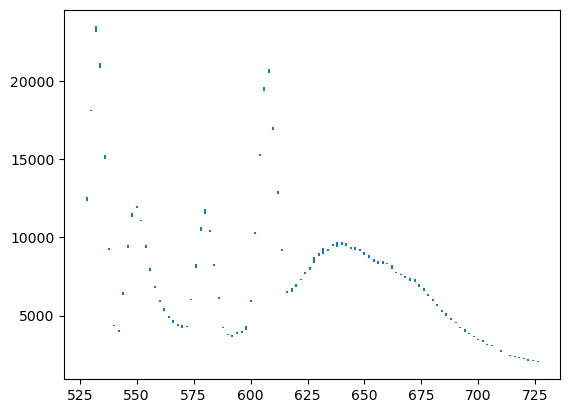

In [6]:
plt.errorbar(sample[:,0],avg_sample,yerr=std_sample,fmt='none')  # complete this line

Let's now prepare and plot the same quantities (the data, their averages, and their standard deviations) for the background spectrum in the `BackgroundSpectrum.txt` data file. Make sure to save the background data under different variable names (let's all use `backgr`, `avg_backgr`, and `std_backgr`) so that we can use both datasets at the same time.

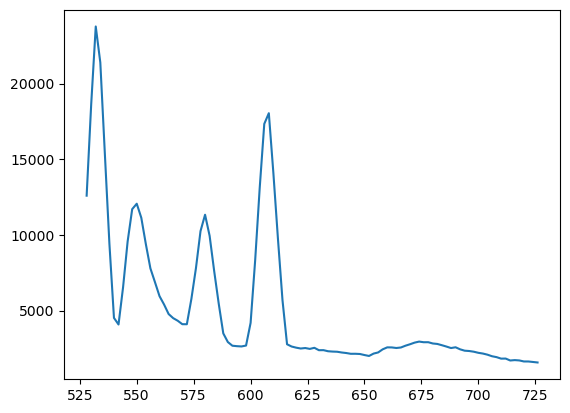

In [7]:
backgr_filename = os.path.join('data', 'BackgroundSpectrum.txt')
backgr = numpy.genfromtxt(fname=backgr_filename, skip_header=7)
avg_backgr = numpy.mean(backgr[:,1:],axis=1)
std_backgr = numpy.std(backgr[:,1:],axis=1)
plt.plot(backgr[:,0],avg_backgr) 

We are getting ready to subtract the background from the sample. Before we do so, let's make sure that both are measured at the same wavelengths. It kind of seemed like the set of wavelengths was the same for both files - let's verify that by checking that two `numpy` arrays are very similar to each other (the values at each place are close). 

In [8]:
numpy.allclose(sample[:,0], backgr[:,0])

True

Fortunately, the sample and the background are measured at exactly the same wavelengths (and in the same order). This means that to subtract the (averaged) background from the (averaged) sample, we just need to subtract two `numpy` arrays - the subtraction will be performed at each position separately.

[-151.5  -490.75 -442.   -391.   -173.75 -138.   -128.25  -73.75 -112.25
 -123.5  -267.   -105.5   -48.25   21.5   174.5   -53.    -12.25  -10.
  137.75  129.25   59.25  206.    189.25  252.    358.25  267.    353.25
  466.    617.    677.25  780.25  874.25 1042.75 1243.75 1331.25 1546.75
 1742.75 1973.   2173.25 2166.25 2598.25 2904.75 3151.   3491.75 3738.
 4002.   4402.5  4808.25 5202.5  5539.   6011.5  6518.5  6749.25 6919.25
 7235.75 7278.25 7391.75 7369.5  7206.75 7147.5  7078.75 6902.5  6775.5
 6386.75 6175.75 5974.75 5765.75 5571.25 5212.75 5065.75 4789.75 4558.
 4380.5  3999.   3755.5  3415.   3169.25 2895.75 2588.25 2473.5  2256.5
 2000.   1788.25 1716.5  1560.   1399.25 1290.75 1224.   1067.5  1111.
 1022.25  914.    848.5   772.75  661.75  615.75  641.    538.25  530.5
  469.25]


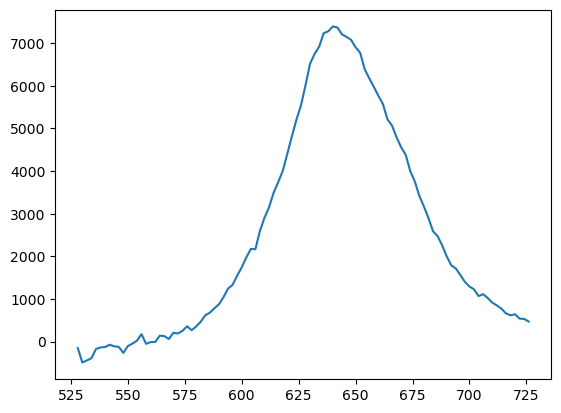

In [10]:
signal = avg_sample - avg_backgr
print(signal)
plt.plot(sample[:,0],signal)  # complete this line

Wow, this background subtraction turned out really helpful! We clearly have one large peak in the spectrum and all those features at small wavelengths have disappeared.

Our last task will be to use the `signal` array to calculate the position and width of the spectral line. Let me show how to do so using the `scipy` library (Scientific Python library for advanced operations on `numpy` arrays). Specifically, we will be using the `scipy.optimize.curve_fit()` function for curve fitting, and fit the signal data with a three-parameter Gaussian curve *he<sup>-a(x-x<sub>0</sub>)<sup>2</sup></sup>*, where *h* is the height, *x<sub>0</sub>* is the central point (the position of the peak), and *a* determines the width. 

The array `p0` specifies the initial guesses for all parameters to `scipy.optimize.curve_fit()` - without specifying `p0`, the initial values for all 3 parameters would be set to `1.0`, and it is quite clear that `1.0` is a REALLY bad guess for either *h* or *x<sub>0</sub>* or *a*. The function you want to fit has to be defined as (yeah, you guessed it) a Python function, with the independent variable `x` as the first argument and the fitted parameters as the next arguments.

[6.45344423e+02 6.58431578e-04 7.06432769e+03]
[8.15787711e-01 1.10828996e+00 1.49775926e+00 2.01345999e+00
 2.69250406e+00 3.58164143e+00 4.73936567e+00 6.23836391e+00
 8.16833548e+00 1.06391958e+01 1.37846712e+01 1.77662757e+01
 2.27776416e+01 2.90491540e+01 3.68528090e+01 4.65071877e+01
 5.83823988e+01 7.29048073e+01 9.05613257e+01 1.11903006e+02
 1.37547628e+02 1.68180962e+02 2.04556336e+02 2.47492142e+02
 2.97866913e+02 3.56611621e+02 4.24698856e+02 5.03128671e+02
 5.92910874e+02 6.95043745e+02 8.10489209e+02 9.40144716e+02
 1.08481219e+03 1.24516463e+03 1.42171116e+03 1.61476134e+03
 1.82439002e+03 2.05040384e+03 2.29231079e+03 2.54929425e+03
 2.82019286e+03 3.10348767e+03 3.39729778e+03 3.69938542e+03
 4.00717141e+03 4.31776134e+03 4.62798265e+03 4.93443218e+03
 5.23353366e+03 5.52160370e+03 5.79492499e+03 6.04982454e+03
 6.28275485e+03 6.49037549e+03 6.66963252e+03 6.81783308e+03
 6.93271259e+03 7.01249239e+03 7.05592545e+03 7.06232890e+03
 7.03160180e+03 6.96422787e+03 6.86126

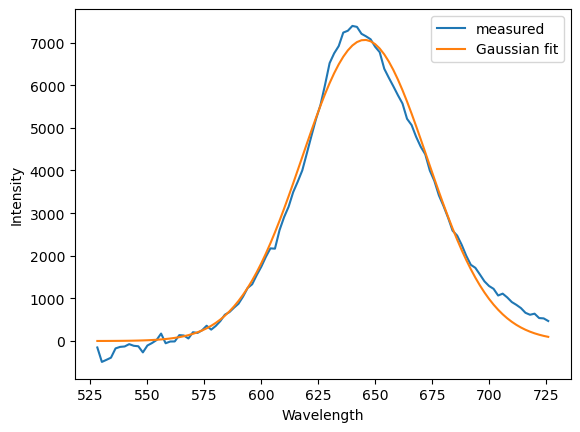

In [12]:
from scipy.optimize import curve_fit

def gaussian(x,x0,a,h):
    return h*numpy.exp(-a*(x-x0)*(x-x0))

params = curve_fit(gaussian, sample[:,0], signal, p0=[650.0,0.01,7000.0]) 
# order of initial values in p0 is the same as order of arguments in gaussian(x,...)
print(params[0])

plt.figure()
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.plot(sample[:,0], signal, label='measured')
fitted_data = gaussian(sample[:,0],params[0][0],params[0][1],params[0][2])
plt.plot(sample[:,0], fitted_data, label='Gaussian fit')
plt.legend()
print(fitted_data)

The `scipy` library has a lot of numerical methods implemented, from curve fitting to matrix algebra to integration to signal processing. We will explore some more of its functions soon, but make sure to also take a look at the online `scipy` documentation. For now, let's switch gears and discuss something different - keeping track of different versions of your code.

# Version control
Have you ever been working on a project and wanted to go back to a previous version of the project? Or perhaps you’ve worked on a group project where multiple people were making changes to files and you ended up with multiple versions of multiple files and it was very confusing? Now imagine that you are working on a software project with 5, 10 or even 100 people. Every person would need their own copies of all the code, but it would be very hard to keep up with the changes each person was making and merge them all together. All of these issues can be handled by using *version control* on your project.

Version control keeps a complete history of your work on a given project. It facilitates collaboration on projects where everyone can work freely on a part of the project without overriding others’ changes. You can move between past versions and rollback when needed. Also, you can review the history of your project through commit messages that describe changes on the source code and see what exactly has been modified in any given commit. You can see who made the changes and when it happened.

This is greatly beneficial whether you are working independently or within a team.

## git and GitHub
The software package `git` is one of the most popular software packages for version control. GitHub is an online hosting service which hosts the files of many software packages that use `git` so that these packages can be shared with other people. Anyone can use `git` locally for version control without using GitHub. To share your code on GitHub, you must create a GitHub account and profile.

Let's first make sure that you have `git` installed in your `class` environment in Anaconda. If not, go ahead and install it! Then, you need to open a terminal where you will configure your `git` installation. In the terminal, navigate (using `cd`) to your class directory and type `conda activate class` to get your `class` environment ready in this terminal.

## Configuring Git
The first time you use Git on a particular computer, you need to configure some things.

First, you should set your identity. One of the most important things that version control like Git does is to keep track of who changes what. This helps repository maintainers coordinate the efforts of all the people who contribute to the project. Most importantly, it makes it easier to figure out who to blame when something goes wrong. To set you identity, *open a Terminal window* and type the following commands:

```
git config --global user.name "<Firstname> <Lastname>"
git config --global user.email "<email address>"
```
You will also need to configure a text editor. For example, if you are on Windows and have installed Visual Studio Code, here is how to configure `git` to use it as your text editor.

```
git config --global core.editor "code --wait"
```
If you are on a Windows and prefer `notepad++` (and have it installed), this is how you can select it:
```
git config --global core.editor "'C:/Program Files (x86)/Notepad++/notepad++.exe' -multiInst -notabbar -nosession -noPlugin"
```
If you are on a Mac and don't know how to use `vim` (the default option), here is how to switch `git` to use `nano`.
```
git config --global core.editor "nano"
```
Next configure the credential helper so you don’t have to type your password as often when performing git operations.
```
git config --global credential.helper cache
```
After you're done setting these options, type
```
git config -l
```
to show a list of all config options that have been set.

# Initializing git on your project
In `git`, a collection of files related to a specific project is called a *repository*. In the Terminal window, navigate to your class folder. In order for the `git` software to know something is a repository, you have to tell `git` that it is. You can check if you are in a `git` repository already by typing
```
git status
```
If you are not in a `git` repository, you should see
```
fatal: not a git repository (or any of the parent directories): .git
```
Tell `git` that you would like to create a repository here, in your class folder, and keep a record of your project by typing
```
git init
```
After you type this command, `git` will initialize an empty repository. Right now, `git` knows that we have started a project, but it doesn’t know what files to track. `Git` will only track the files you tell it to.

You can see the status of your repository by typing
```
git status
```

The exact output will vary depending on file names in your directory. This will list all of the files in your repository and tell you that none of them are tracked. This means that `git` sees the files, but is not keeping a record of them or watching them for changes. We want to tell `git` to start watching these files.

## git add, git status, git commit
Making a commit is like making a checkpoint for a particular version of your code. You can easily return to, or revert to that checkpoint.

We might modify many files at a time in a repository. Thus, the first step in creating a checkpoint (or commit) is to tell git which files we want to include in the checkpoint. We do this with a command called `git add`. This adds files to what is called the staging area.

When we use a `git status` command, git tells us to use `git add` to include what will be committed. We want to add the file that we worked on today to the staging area by typing

```
git add Class10.ipynb
```
When you call `git status`, you will see that the output message has changed. It now tells us we should perform a `commit`.

We are now on the second step of creating a commit. We have added our files to the staging area.

To create the checkpoint, or commit, we will now use the `git commit` command. We add a `-m` after the command for “message.” Whenever you create a commit, you should write a message about what the commit does. If you skip the `-m` option, `git commit` will drop you in a text editor to compose a message.

```
git commit -m "add initial project files"
```

Every time you make a commit, this is now part of the official record of what is in the repository, so you have to write a commit message telling people what is being added. You can write anything you want in these comments, but the best practice is to write something short but descriptive about the files that are being added or changed. Even if you think no one else is ever going to use your code, writing good commit messages is a great way to remind yourself of what you have done in the past. It is good practice for these to be descriptive rather than general, so a message like “Add function for calculating bond lengths” is much better than something non-descriptive like “Commit #5.”

Now when you type `git status` it should say “nothing added to commit but untracked files present”. This means that no changes have been made to your tracked file since your last checkpoint or commit, and the other files in your class folder are not tracked.

Let’s make and track one more change to our repository. Open the first cell with code and add a docstring at the top of the file.
```
"""
This code subtracts the background and locates the peak position in Dr. Ohno's spectrum.
"""
```
Save this change and commit it.

First, we will do a `git status`. Then, to create a checkpoint with the new version, type
```
git add Class10.ipynb
git commit -m "add docstring to Class10.ipynb"
```

## The `git log` command
Git creates a history of our project, but how do we see or use that history? You can see a history of commits using the `git log` command.

Each line of this log tells you something important about the commit, or check point that exists for the project. On the first line,

```
commit adf1dcc0bf88a4971f37edecd80ee25d544c6a6b (HEAD -> master)
```

You have a unique identifier for the commit (`adf1d...`). You can use this number to reference this checkpoint.

Then, git records the name of the author who made the change.

```
Author: Your Name <your_email_address@something.com>
```
This should be your information. This way, anyone who downloads this project can see who made each commit. Note that this name and email address matches what you specified when you configured git in the setup.

```
Date:   Sat Feb 18 22:20:37 2023 -0500
```
Next, it lists the date and time the commit was made.

```
add initial project files
```

Finally, there will be a blank line followed by a commit message. The commit message is a message whoever made the commit chose to write, but should describe the change that took place when the commit was made.

`git log` shows a history of commits to our repository, and they will all have the same format discussed above. Notice that commits are in reverse chronological order, with the most recent change listed first.


## Viewing changes
If you want to see what changed between commits, use the command

```
git diff COMMIT_ID_1 COMMIT_ID_2
```

Let’s do this for our last commit. We will compare the version at commit 2 to commit 1. You can quickly see commit ids using the command

```
git log --oneline
adf1dcc (HEAD -> master) Tiny change because notebook updated.
5fca176 add initial project files
```
We will compare these two commit IDs

```
git diff adf1dcc 5fca176
```

The `+` next to lines tells us that those lines were added from commit 1 to commit 2. If any lines had been deleted, they would appear with a `-` sign next to them.

## Checkout and view previous versions
If you need to revert to a previous version

```
git checkout COMMIT_ID
```
This will temporarily revert the repository to whatever the state was at the specified commit ID.

Let’s checkout the version before we made the most recent edit to `Class10.ipynb`. You will get your commit ID from `git log`.

```
git checkout 707b644
```
If you now reopen and view the file `Class10.ipynb`, it is the previous version of the file.

To return to the most recent point,

```
git checkout master
```

## More Tutorials
If you want to learn more functions of `git`, see the following tutorials.

[Software Carpentry Version Control with Git](https://swcarpentry.github.io/git-novice/)

[GitHub 15 Minutes to Learn Git](https://docs.github.com/en/get-started/quickstart/set-up-git)

[Git Commit Best Practices](https://github.com/trein/dev-best-practices/wiki/Git-Commit-Best-Practices)